# Parser for MINCUT-MAXFLOW algorithm
This script does the following;
1. extracts the required (1) flow-data and (2) node-data, 
2. builds a graph network using networkx, 
3. executes MINCUT-MAXFLOW algorithm,  
4. and exports a CSV with the results.

#### 1. Load data into dictionary from .csv with the following __schedule__;

edge_id,source_name,sink_name,source_lat,source_lon,sink_lat,sink_lon,record_count,scheduled,abs_median_deviation,relative_deviation_factor,flow

In [1]:
import csv
import os

# Establish dictionary for edges
edges = {}

# Load data about each edge in Uppsala Network (UL)
with open('./data/ul_edge_flows.csv') as file:
    reader1 = csv.DictReader(file)
    # Create dictionary key for each row in the csv with values on name, latitude and longitude
    for row in reader1:
        edges[row['edge_id']] = dict(row)

In [2]:
# Establish dictionary for stops / nodes
stops = {}

# Variable precision – to cluster nodes by only looking at the 13 first characters
ci=13

# Directory where the static network data is located
directory = '../../data/static/'

# Load data about all stops (nodes) in the Uppsala Network (UL)
for mapp in os.listdir(directory):
    print("Reading directory",mapp)
    
    try:
        with open(directory + mapp + '/stops.txt') as file:
            reader2 = csv.DictReader(file)
            # Create dictionary key for each row in stops.csv with values on name, latitude and longitude
            
            for row in reader2:
                if (row['stop_id'][0:ci] not in stops):
                    print("\t","Stop",row['stop_id'][0:ci],"added to stops dictionary")
                    stops[row['stop_id'][0:ci]] = {'stop_id': row['stop_id'][0:ci], 'stop_name': row['stop_name'],
                                             'stop_lat': row['stop_lat'], 'stop_lon': row['stop_lon']}
    except NotADirectoryError:
        continue


Reading directory .DS_Store
Reading directory 20
	 Stop 9021003760429 added to stops dictionary
	 Stop 9021003780538 added to stops dictionary
	 Stop 9021003099801 added to stops dictionary
	 Stop 9021003099802 added to stops dictionary
	 Stop 9021003099803 added to stops dictionary
	 Stop 9021003099804 added to stops dictionary
	 Stop 9021003099812 added to stops dictionary
	 Stop 9021003781082 added to stops dictionary
	 Stop 9021003092000 added to stops dictionary
	 Stop 9021003099823 added to stops dictionary
	 Stop 9021003099701 added to stops dictionary
	 Stop 9021003099121 added to stops dictionary
	 Stop 9021003099131 added to stops dictionary
	 Stop 9021003099141 added to stops dictionary
	 Stop 9021003779013 added to stops dictionary
	 Stop 9021003779040 added to stops dictionary
	 Stop 9021003780124 added to stops dictionary
	 Stop 9021003780126 added to stops dictionary
	 Stop 9021003780206 added to stops dictionary
	 Stop 9021003780505 added to stops dictionary
	 Stop 9021

	 Stop 9021003782322 added to stops dictionary
	 Stop 9021003782323 added to stops dictionary
	 Stop 9021003782324 added to stops dictionary
	 Stop 9021003782325 added to stops dictionary
	 Stop 9021003782326 added to stops dictionary
	 Stop 9021003782327 added to stops dictionary
	 Stop 9021003782328 added to stops dictionary
	 Stop 9021003782329 added to stops dictionary
	 Stop 9021003782330 added to stops dictionary
	 Stop 9021003782332 added to stops dictionary
	 Stop 9021003782333 added to stops dictionary
	 Stop 9021003782334 added to stops dictionary
	 Stop 9021003782335 added to stops dictionary
	 Stop 9021003782336 added to stops dictionary
	 Stop 9021003782337 added to stops dictionary
	 Stop 9021003782338 added to stops dictionary
	 Stop 9021003782339 added to stops dictionary
	 Stop 9021003782340 added to stops dictionary
	 Stop 9021003782341 added to stops dictionary
	 Stop 9021003782342 added to stops dictionary
	 Stop 9021003782343 added to stops dictionary
	 Stop 902100

	 Stop 9021003781238 added to stops dictionary
	 Stop 9021003781239 added to stops dictionary
	 Stop 9021003781240 added to stops dictionary
	 Stop 9021003781241 added to stops dictionary
	 Stop 9021003781242 added to stops dictionary
	 Stop 9021003781244 added to stops dictionary
	 Stop 9021003781245 added to stops dictionary
	 Stop 9021003781246 added to stops dictionary
	 Stop 9021003781247 added to stops dictionary
	 Stop 9021003781248 added to stops dictionary
	 Stop 9021003781249 added to stops dictionary
	 Stop 9021003781250 added to stops dictionary
	 Stop 9021003781252 added to stops dictionary
	 Stop 9021003781253 added to stops dictionary
	 Stop 9021003781254 added to stops dictionary
	 Stop 9021003781255 added to stops dictionary
	 Stop 9021003781257 added to stops dictionary
	 Stop 9021003781258 added to stops dictionary
	 Stop 9021003781259 added to stops dictionary
	 Stop 9021003781260 added to stops dictionary
	 Stop 9021003781261 added to stops dictionary
	 Stop 902100

	 Stop 9021003730095 added to stops dictionary
	 Stop 9021003730096 added to stops dictionary
	 Stop 9021003730097 added to stops dictionary
	 Stop 9021003730098 added to stops dictionary
	 Stop 9021003730099 added to stops dictionary
	 Stop 9021003730100 added to stops dictionary
	 Stop 9021003730101 added to stops dictionary
	 Stop 9021003730102 added to stops dictionary
	 Stop 9021003730103 added to stops dictionary
	 Stop 9021003730104 added to stops dictionary
	 Stop 9021003730105 added to stops dictionary
	 Stop 9021003730106 added to stops dictionary
	 Stop 9021003730107 added to stops dictionary
	 Stop 9021003730108 added to stops dictionary
	 Stop 9021003730109 added to stops dictionary
	 Stop 9021003730110 added to stops dictionary
	 Stop 9021003730111 added to stops dictionary
	 Stop 9021003730112 added to stops dictionary
	 Stop 9021003730113 added to stops dictionary
	 Stop 9021003730114 added to stops dictionary
	 Stop 9021003730115 added to stops dictionary
	 Stop 902100

	 Stop 9021003191730 added to stops dictionary
	 Stop 9021003191731 added to stops dictionary
	 Stop 9021003191732 added to stops dictionary
	 Stop 9021003191733 added to stops dictionary
	 Stop 9021003191734 added to stops dictionary
	 Stop 9021003191735 added to stops dictionary
	 Stop 9021003191737 added to stops dictionary
	 Stop 9021003191738 added to stops dictionary
	 Stop 9021003191739 added to stops dictionary
	 Stop 9021003191740 added to stops dictionary
	 Stop 9021003791236 added to stops dictionary
	 Stop 9021003791305 added to stops dictionary
	 Stop 9021003194001 added to stops dictionary
	 Stop 9021003194002 added to stops dictionary
	 Stop 9021003194003 added to stops dictionary
	 Stop 9021003194005 added to stops dictionary
	 Stop 9021003194006 added to stops dictionary
	 Stop 9021003194007 added to stops dictionary
	 Stop 9021003194008 added to stops dictionary
	 Stop 9021003194009 added to stops dictionary
	 Stop 9021003194010 added to stops dictionary
	 Stop 902100

	 Stop 9021003093041 added to stops dictionary
	 Stop 9021003093042 added to stops dictionary
	 Stop 9021003093043 added to stops dictionary
	 Stop 9021003093044 added to stops dictionary
	 Stop 9021003093050 added to stops dictionary
	 Stop 9021003093054 added to stops dictionary
	 Stop 9021003093130 added to stops dictionary
	 Stop 9021003093140 added to stops dictionary
	 Stop 9021003660600 added to stops dictionary
	 Stop 9021003793001 added to stops dictionary
	 Stop 9021003793005 added to stops dictionary
	 Stop 9021003793007 added to stops dictionary
	 Stop 9021003793008 added to stops dictionary
	 Stop 9021003793009 added to stops dictionary
	 Stop 9021003793010 added to stops dictionary
	 Stop 9021003793011 added to stops dictionary
	 Stop 9021003793012 added to stops dictionary
	 Stop 9021003793013 added to stops dictionary
	 Stop 9021003793014 added to stops dictionary
	 Stop 9021003793015 added to stops dictionary
	 Stop 9021003793023 added to stops dictionary
	 Stop 902100

	 Stop 9021003700250 added to stops dictionary
	 Stop 9021003700251 added to stops dictionary
	 Stop 9021003700252 added to stops dictionary
	 Stop 9021003700253 added to stops dictionary
	 Stop 9021003700254 added to stops dictionary
	 Stop 9021003700255 added to stops dictionary
	 Stop 9021003700256 added to stops dictionary
	 Stop 9021003700258 added to stops dictionary
	 Stop 9021003700259 added to stops dictionary
	 Stop 9021003700260 added to stops dictionary
	 Stop 9021003700262 added to stops dictionary
	 Stop 9021003700265 added to stops dictionary
	 Stop 9021003700266 added to stops dictionary
	 Stop 9021003700268 added to stops dictionary
	 Stop 9021003700270 added to stops dictionary
	 Stop 9021003700271 added to stops dictionary
	 Stop 9021003700272 added to stops dictionary
	 Stop 9021003700274 added to stops dictionary
	 Stop 9021003700275 added to stops dictionary
	 Stop 9021003700277 added to stops dictionary
	 Stop 9021003700278 added to stops dictionary
	 Stop 902100

	 Stop 9021003779592 added to stops dictionary
	 Stop 9021003779593 added to stops dictionary
	 Stop 9021003779594 added to stops dictionary
	 Stop 9021003779595 added to stops dictionary
	 Stop 9021003779596 added to stops dictionary
	 Stop 9021003779597 added to stops dictionary
	 Stop 9021003779598 added to stops dictionary
	 Stop 9021003779599 added to stops dictionary
	 Stop 9021003779600 added to stops dictionary
	 Stop 9021003779601 added to stops dictionary
	 Stop 9021003779602 added to stops dictionary
	 Stop 9021003779603 added to stops dictionary
	 Stop 9021003779604 added to stops dictionary
	 Stop 9021003779605 added to stops dictionary
	 Stop 9021003779606 added to stops dictionary
	 Stop 9021003779607 added to stops dictionary
	 Stop 9021003779608 added to stops dictionary
	 Stop 9021003779609 added to stops dictionary
	 Stop 9021003779610 added to stops dictionary
	 Stop 9021003779612 added to stops dictionary
	 Stop 9021003779613 added to stops dictionary
	 Stop 902100

	 Stop 9021003780591 added to stops dictionary
	 Stop 9021003780592 added to stops dictionary
	 Stop 9021003780593 added to stops dictionary
	 Stop 9021003780594 added to stops dictionary
	 Stop 9021003780596 added to stops dictionary
	 Stop 9021003780597 added to stops dictionary
	 Stop 9021003780598 added to stops dictionary
	 Stop 9021003780599 added to stops dictionary
	 Stop 9021003780600 added to stops dictionary
	 Stop 9021003780601 added to stops dictionary
	 Stop 9021003780602 added to stops dictionary
	 Stop 9021003780603 added to stops dictionary
	 Stop 9021003780604 added to stops dictionary
	 Stop 9021003780605 added to stops dictionary
	 Stop 9021003780606 added to stops dictionary
	 Stop 9021003780607 added to stops dictionary
	 Stop 9021003780608 added to stops dictionary
	 Stop 9021003780609 added to stops dictionary
	 Stop 9021003780611 added to stops dictionary
	 Stop 9021003780612 added to stops dictionary
	 Stop 9021003780613 added to stops dictionary
	 Stop 902100

	 Stop 9022003099804 added to stops dictionary
	 Stop 9022003090114 added to stops dictionary
	 Stop 9022003700589 added to stops dictionary
	 Stop 9022003099201 added to stops dictionary
	 Stop 9022003099203 added to stops dictionary
	 Stop 9022003181618 added to stops dictionary
	 Stop 9022003781001 added to stops dictionary
	 Stop 9022003781002 added to stops dictionary
	 Stop 9022003781003 added to stops dictionary
	 Stop 9022003781004 added to stops dictionary
	 Stop 9022003781005 added to stops dictionary
	 Stop 9022003781007 added to stops dictionary
	 Stop 9022003781008 added to stops dictionary
	 Stop 9022003781009 added to stops dictionary
	 Stop 9022003781010 added to stops dictionary
	 Stop 9022003781011 added to stops dictionary
	 Stop 9022003781012 added to stops dictionary
	 Stop 9022003781013 added to stops dictionary
	 Stop 9022003781014 added to stops dictionary
	 Stop 9022003781015 added to stops dictionary
	 Stop 9022003781017 added to stops dictionary
	 Stop 902200

	 Stop 9022003781653 added to stops dictionary
	 Stop 9022003781654 added to stops dictionary
	 Stop 9022003781655 added to stops dictionary
	 Stop 9022003781656 added to stops dictionary
	 Stop 9022003781657 added to stops dictionary
	 Stop 9022003781658 added to stops dictionary
	 Stop 9022003781659 added to stops dictionary
	 Stop 9022003781660 added to stops dictionary
	 Stop 9022003781661 added to stops dictionary
	 Stop 9022003781662 added to stops dictionary
	 Stop 9022003781663 added to stops dictionary
	 Stop 9022003781664 added to stops dictionary
	 Stop 9022003781665 added to stops dictionary
	 Stop 9022003781666 added to stops dictionary
	 Stop 9022003781667 added to stops dictionary
	 Stop 9022003781668 added to stops dictionary
	 Stop 9022003781669 added to stops dictionary
	 Stop 9022003781670 added to stops dictionary
	 Stop 9022003781671 added to stops dictionary
	 Stop 9022003781672 added to stops dictionary
	 Stop 9022003781673 added to stops dictionary
	 Stop 902200

	 Stop 9022003782405 added to stops dictionary
	 Stop 9022003782406 added to stops dictionary
	 Stop 9022003782407 added to stops dictionary
	 Stop 9022003782408 added to stops dictionary
	 Stop 9022003782409 added to stops dictionary
	 Stop 9022003782412 added to stops dictionary
	 Stop 9022003782413 added to stops dictionary
	 Stop 9022003782414 added to stops dictionary
	 Stop 9022003782417 added to stops dictionary
	 Stop 9022003782418 added to stops dictionary
	 Stop 9022003782419 added to stops dictionary
	 Stop 9022003782420 added to stops dictionary
	 Stop 9022003782421 added to stops dictionary
	 Stop 9022003782422 added to stops dictionary
	 Stop 9022003782423 added to stops dictionary
	 Stop 9022003782424 added to stops dictionary
	 Stop 9022003782426 added to stops dictionary
	 Stop 9022003782427 added to stops dictionary
	 Stop 9022003782428 added to stops dictionary
	 Stop 9022003782429 added to stops dictionary
	 Stop 9022003782430 added to stops dictionary
	 Stop 902200

	 Stop 9022003700597 added to stops dictionary
	 Stop 9022003700600 added to stops dictionary
	 Stop 9022003700602 added to stops dictionary
	 Stop 9022003700603 added to stops dictionary
	 Stop 9022003700604 added to stops dictionary
	 Stop 9022003700605 added to stops dictionary
	 Stop 9022003700607 added to stops dictionary
	 Stop 9022003700608 added to stops dictionary
	 Stop 9022003700610 added to stops dictionary
	 Stop 9022003700613 added to stops dictionary
	 Stop 9022003700615 added to stops dictionary
	 Stop 9022003700616 added to stops dictionary
	 Stop 9022003700617 added to stops dictionary
	 Stop 9022003700619 added to stops dictionary
	 Stop 9022003700620 added to stops dictionary
	 Stop 9022003700621 added to stops dictionary
	 Stop 9022003700622 added to stops dictionary
	 Stop 9022003700623 added to stops dictionary
	 Stop 9022003700626 added to stops dictionary
	 Stop 9022003700628 added to stops dictionary
	 Stop 9022003700629 added to stops dictionary
	 Stop 902200

	 Stop 9022003780171 added to stops dictionary
	 Stop 9022003780173 added to stops dictionary
	 Stop 9022003780174 added to stops dictionary
	 Stop 9022003780176 added to stops dictionary
	 Stop 9022003780177 added to stops dictionary
	 Stop 9022003780178 added to stops dictionary
	 Stop 9022003780179 added to stops dictionary
	 Stop 9022003780180 added to stops dictionary
	 Stop 9022003780181 added to stops dictionary
	 Stop 9022003780182 added to stops dictionary
	 Stop 9022003780183 added to stops dictionary
	 Stop 9022003780184 added to stops dictionary
	 Stop 9022003780185 added to stops dictionary
	 Stop 9022003780186 added to stops dictionary
	 Stop 9022003780187 added to stops dictionary
	 Stop 9022003780188 added to stops dictionary
	 Stop 9022003780189 added to stops dictionary
	 Stop 9022003780190 added to stops dictionary
	 Stop 9022003780191 added to stops dictionary
	 Stop 9022003780192 added to stops dictionary
	 Stop 9022003780193 added to stops dictionary
	 Stop 902200

	 Stop 9022003780804 added to stops dictionary
	 Stop 9022003780805 added to stops dictionary
	 Stop 9022003780806 added to stops dictionary
	 Stop 9022003780807 added to stops dictionary
	 Stop 9022003780808 added to stops dictionary
	 Stop 9022003780809 added to stops dictionary
	 Stop 9022003780810 added to stops dictionary
	 Stop 9022003780811 added to stops dictionary
	 Stop 9022003780812 added to stops dictionary
	 Stop 9022003780813 added to stops dictionary
	 Stop 9022003780814 added to stops dictionary
	 Stop 9022003780815 added to stops dictionary
	 Stop 9022003780816 added to stops dictionary
	 Stop 9022003780817 added to stops dictionary
	 Stop 9022003780818 added to stops dictionary
	 Stop 9022003780819 added to stops dictionary
	 Stop 9022003780820 added to stops dictionary
	 Stop 9022003780821 added to stops dictionary
	 Stop 9022003780822 added to stops dictionary
	 Stop 9022003780823 added to stops dictionary
	 Stop 9022003780824 added to stops dictionary
	 Stop 902200

	 Stop 9022003719074 added to stops dictionary
	 Stop 9022003719075 added to stops dictionary
	 Stop 9022003719076 added to stops dictionary
	 Stop 9022003719077 added to stops dictionary
	 Stop 9022003719078 added to stops dictionary
	 Stop 9022003719079 added to stops dictionary
	 Stop 9022003719080 added to stops dictionary
	 Stop 9022003719081 added to stops dictionary
	 Stop 9022003719082 added to stops dictionary
	 Stop 9022003719083 added to stops dictionary
	 Stop 9022003719084 added to stops dictionary
	 Stop 9022003719085 added to stops dictionary
	 Stop 9022003719086 added to stops dictionary
	 Stop 9022003719087 added to stops dictionary
	 Stop 9022003719088 added to stops dictionary
	 Stop 9022003719089 added to stops dictionary
	 Stop 9022003719090 added to stops dictionary
	 Stop 9022003719091 added to stops dictionary
	 Stop 9022003719092 added to stops dictionary
	 Stop 9022003719093 added to stops dictionary
	 Stop 9022003719094 added to stops dictionary
	 Stop 902200

	 Stop 9022003779043 added to stops dictionary
	 Stop 9022003779163 added to stops dictionary
	 Stop 9022003780005 added to stops dictionary
	 Stop 9022003780008 added to stops dictionary
	 Stop 9022003780013 added to stops dictionary
	 Stop 9022003780019 added to stops dictionary
	 Stop 9022003780029 added to stops dictionary
	 Stop 9022003780030 added to stops dictionary
	 Stop 9022003780031 added to stops dictionary
	 Stop 9022003780032 added to stops dictionary
	 Stop 9022003780033 added to stops dictionary
	 Stop 9022003780050 added to stops dictionary
	 Stop 9022003780111 added to stops dictionary
	 Stop 9022003780112 added to stops dictionary
	 Stop 9022003780113 added to stops dictionary
	 Stop 9022003780115 added to stops dictionary
	 Stop 9022003780116 added to stops dictionary
	 Stop 9022003780117 added to stops dictionary
	 Stop 9022003780139 added to stops dictionary
	 Stop 9022003780217 added to stops dictionary
	 Stop 9022003780219 added to stops dictionary
	 Stop 902200

	 Stop 9022003191344 added to stops dictionary
	 Stop 9022003191345 added to stops dictionary
	 Stop 9022003191346 added to stops dictionary
	 Stop 9022003191347 added to stops dictionary
	 Stop 9022003191701 added to stops dictionary
	 Stop 9022003191702 added to stops dictionary
	 Stop 9022003191703 added to stops dictionary
	 Stop 9022003191704 added to stops dictionary
	 Stop 9022003191705 added to stops dictionary
	 Stop 9022003191706 added to stops dictionary
	 Stop 9022003191707 added to stops dictionary
	 Stop 9022003191708 added to stops dictionary
	 Stop 9022003191709 added to stops dictionary
	 Stop 9022003191710 added to stops dictionary
	 Stop 9022003191711 added to stops dictionary
	 Stop 9022003191712 added to stops dictionary
	 Stop 9022003191713 added to stops dictionary
	 Stop 9022003191714 added to stops dictionary
	 Stop 9022003191715 added to stops dictionary
	 Stop 9022003191716 added to stops dictionary
	 Stop 9022003191717 added to stops dictionary
	 Stop 902200

	 Stop 9022003760414 added to stops dictionary
	 Stop 9022003760415 added to stops dictionary
	 Stop 9022003760416 added to stops dictionary
	 Stop 9022003760417 added to stops dictionary
	 Stop 9022003760418 added to stops dictionary
	 Stop 9022003760419 added to stops dictionary
	 Stop 9022003760420 added to stops dictionary
	 Stop 9022003760421 added to stops dictionary
	 Stop 9022003760422 added to stops dictionary
	 Stop 9022003760423 added to stops dictionary
	 Stop 9022003760424 added to stops dictionary
	 Stop 9022003760425 added to stops dictionary
	 Stop 9022003760426 added to stops dictionary
	 Stop 9022003760428 added to stops dictionary
	 Stop 9022003760429 added to stops dictionary
	 Stop 9022003760430 added to stops dictionary
	 Stop 9022003760431 added to stops dictionary
	 Stop 9022003760432 added to stops dictionary
	 Stop 9022003760433 added to stops dictionary
	 Stop 9022003760434 added to stops dictionary
	 Stop 9022003760435 added to stops dictionary
	 Stop 902200

#### 2. Build a directed and weighted graph from the data

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import math

# Build graph from dictionary of edges
H = nx.DiGraph()
for i,edge in enumerate(edges.values()):
    #print(edge['source_id'], edge['sink_id'], round(float(edge['index']),2))
        H.add_edge(int(edge['source_id']),int(edge['sink_id']),a=float(edge['flow']))

/Users/x/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/x/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


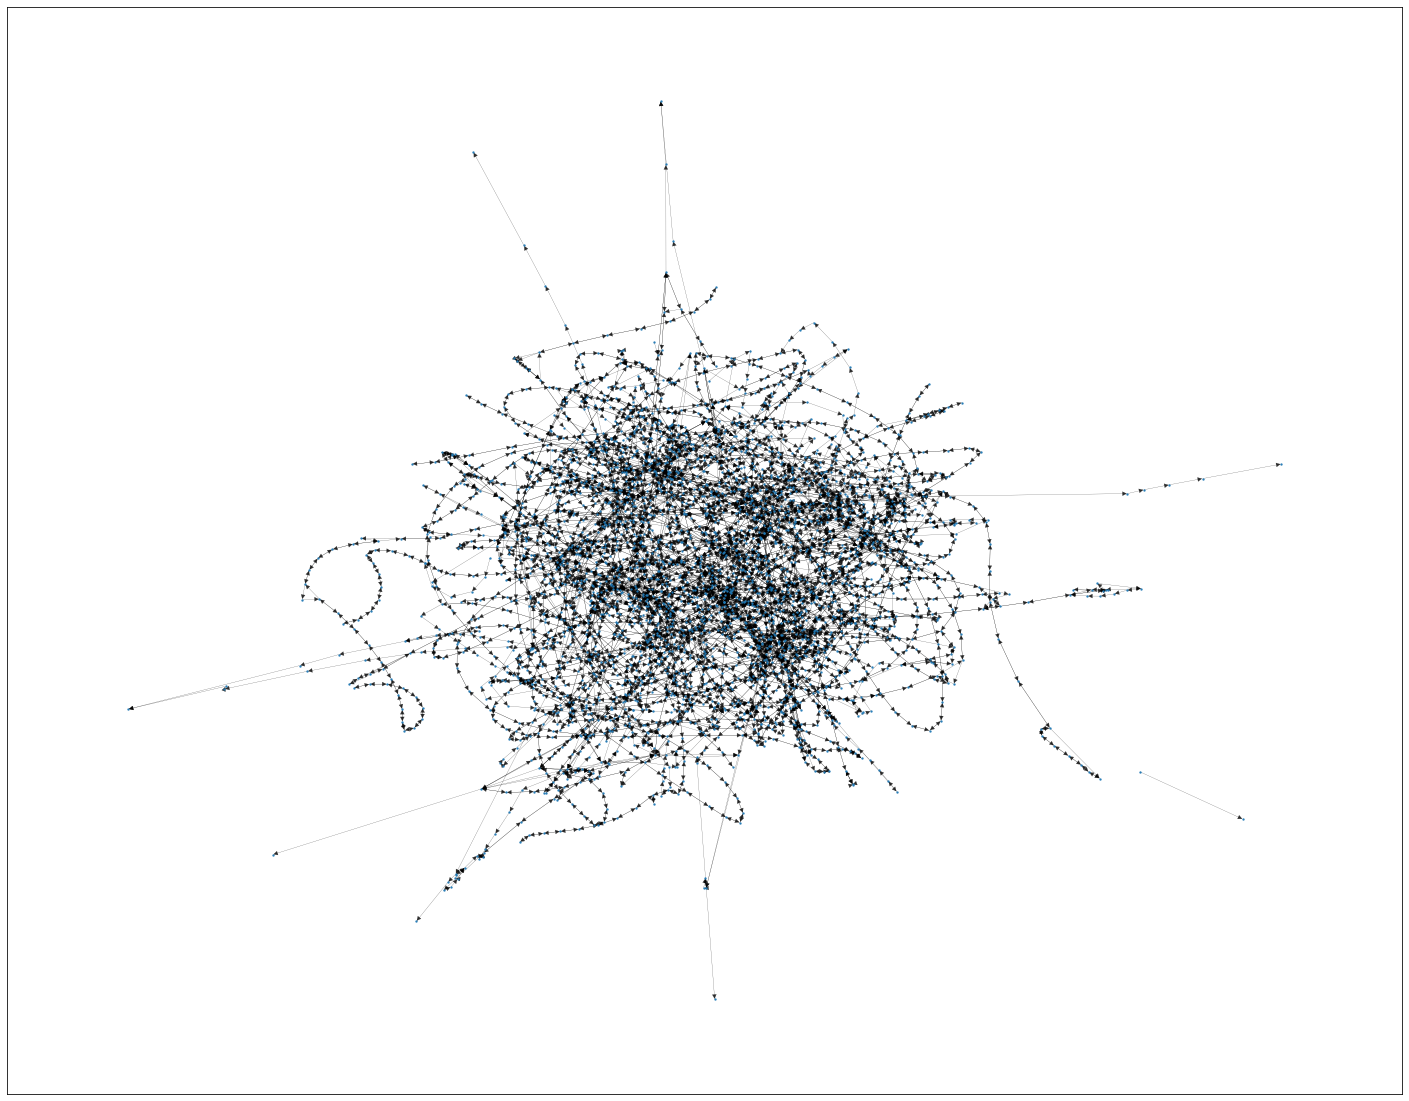

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(25, 20));
nx.draw_networkx(H, ax=ax, with_labels=False,node_size=2,alpha=0.8,width=0.2)

#### 2. Establish methods for algorithms

MINCUT-MAXFLOW: The function __minimum_cut()__ returns cut_value that is the total weight of all cutting edges, as well as 2 sets of nodes each of them is a partition that contains the "s" or the "t" from which you can easily compute the edge_cut.

In [9]:
import numpy as np
import pandas as pd

def hasPath(s,t):
    return nx.has_path(H,s,t)

def shortestPath(s,t):
    return nx.shortest_path(H,s,t,weight='a')

def mincut(s,t):
    cut_value, [reachable, non_reachable] = nx.minimum_cut(H,s,t, capacity='a')
    return [cut_value, len(reachable), len(non_reachable)]

#### 3. Execute MINCUT-MAXFLOW algorithm from central station to all nodes in the network

In [7]:
def mincutFromAllNodes(sink_input_id):
    vals = []
    sink_id=stops[str(sink_input_id)]['stop_id']
    sink_name=stops[str(sink_input_id)]['stop_name']
    sink_lon=stops[str(sink_input_id)]['stop_lon']
    sink_lat=stops[str(sink_input_id)]['stop_lat']
    for node in H.nodes():
        if node != sink_input_id:
            source_id=stops[str(node)]['stop_id']
            source_name=stops[str(node)]['stop_name']
            source_lon=stops[str(node)]['stop_lon']
            source_lat=stops[str(node)]['stop_lat']
            print(round(mincut(sink_input_id,node)[0],4),"\t",mincut(sink_input_id,node)[1],"\t",mincut(sink_input_id,node)[2],"\t",source_id,source_name,sink_id,sink_name)
            vals.append((mincut(sink_input_id,node)[0],mincut(sink_input_id,node)[1],mincut(sink_input_id,node)[2],source_id,source_name,source_lon,source_lat,sink_id,sink_name,sink_lon,sink_lat))
    output = np.array(vals, dtype=str)
    pd.DataFrame(output).to_csv("./mincut_values_to_" + sink_id +".csv",index=False,header=['cut_value','reachable','non_reachable','source_id','source_name','source_lon','source_lat','sink_id','sink_name','sink_lon','sink_lat'])


In [10]:
mincutFromAllNodes(9022003700600)

1.2545 	 3027 	 1 	 9022003799482 Karlsborg 9022003700600 Uppsala Centralstationen (Uppsala)
8.6565 	 3010 	 18 	 9022003780148 Solvallen (Uppsala) 9022003700600 Uppsala Centralstationen (Uppsala)
2.645 	 3027 	 1 	 9022003799481 Torsbro (Ramsta) 9022003700600 Uppsala Centralstationen (Uppsala)
2.728 	 3026 	 2 	 9022003780851 Vissgärde (Uppsala) 9022003700600 Uppsala Centralstationen (Uppsala)
80.5415 	 2947 	 81 	 9022003780367 Ramsta kyrka (Uppsala) 9022003700600 Uppsala Centralstationen (Uppsala)
0.6084 	 3023 	 5 	 9022003799480 Fullerö hage Skolhållplats 9022003700600 Uppsala Centralstationen (Uppsala)
36.1567 	 3022 	 6 	 9022003780599 Östaladan (Uppsala) 9022003700600 Uppsala Centralstationen (Uppsala)
1.18 	 3027 	 1 	 9022003799010 Funbo Sommarro 9022003700600 Uppsala Centralstationen (Uppsala)
36.4835 	 2835 	 193 	 9022003780444 Funbo kyrka (Uppsala) 9022003700600 Uppsala Centralstationen (Uppsala)
1.3787 	 3024 	 4 	 9022003780134 Marielunds gård (Uppsala) 9022003700600 Up

KeyboardInterrupt: 

#### X. Computing the average degree connectivity of the graph.

The average degree connectivity is the average nearest neighbor degree of nodes with degree k. For weighted graphs, an analogous measure is computed using the weighted average neighbors degree.

In [49]:
nx.k_nearest_neighbors(H,'in+out','in+out',weight='a')

{2: 2.4672023137530177,
 9: 3.224797061013991,
 4: 2.690590334544085,
 5: 3.307009610920636,
 7: 3.474515012799073,
 13: 4.114950728276256,
 6: 3.8492849489603422,
 8: 3.8925991453181568,
 14: 7.229046794091129,
 10: 3.627162312958644,
 37: 3.0959056499210496,
 12: 5.53815962949278,
 15: 4.256128187725079,
 3: 2.2447156583597403,
 11: 4.22422563283959,
 22: 5.015754654621449,
 1: 2.8887861144525186,
 19: 3.7301644626725565,
 28: 3.158386124247803,
 20: 3.3674846702805685,
 17: 3.040184422923833,
 18: 4.004449276219838,
 16: 3.360466264596977}

#### Y. Compute load centrality for nodes.

The load centrality of a node is the *fraction of all shortest paths* that pass through that node.

In [69]:
load_centrality = nx.load_centrality(H,weight='a')
betweenness_centrality = nx.betweenness_centrality(H,weight='a')